# 作业一 数据探索性分析与数据预处理

# 数据集：Oakland Crime Statistics 2011 to 2016

## 代码地址：https://github.com/lijie0610/data_mining/tree/data_analysis

# 0 数据准备及查看

In [1]:
#导入包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
from math import isnan
import math


## 查看数据集

以records-for-2011.csv为例

In [2]:
#读取数据集
data = pd.read_csv('D:/Users/Desktop/data/Oakland Crime Statistics 2011 to 2016/records-for-2011.csv',index_col=0)
data.head()#数据展示

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [3]:
data.shape #数据集的大小

(180016, 9)

records-for-2011.csv包含9列和18万行犯罪数据。

# 1 数据可视化和摘要



## 1.1 数据摘要
### 标称属性，给出每个可能聚会的频数

标称属性有'Create Time','Location','Beat','Incident Type Id','Incident Type Description','Event Number','Closed Time'<br>
统计每个属性的频数

In [4]:
pd.value_counts(data['Create Time'])#Create Time

2011-06-02T00:00:00.000    4
2011-09-21T14:05:59.000    3
2011-03-27T00:22:41.000    3
2011-05-22T15:48:40.000    2
2011-09-01T11:04:43.000    2
                          ..
2011-01-28T12:39:28.000    1
2011-07-19T11:18:43.000    1
2011-06-28T08:53:55.000    1
2011-03-24T17:18:01.000    1
2011-05-26T22:33:55.000    1
Name: Create Time, Length: 179451, dtype: int64

In [5]:
pd.value_counts(data['Location'])#Location

 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
84TH WALNUT ST                1
EDES OLIVE ST                 1
7TH BRUSH ST                  1
MORAGA 42ND AV                1
106TH COLLEGE AV              1
Name: Location, Length: 32505, dtype: int64

In [6]:
pd.value_counts(data['Beat'])#Beat

04X     7410
08X     6885
26Y     5478
30Y     5295
06X     5119
23X     5051
30X     4956
19X     4955
34X     4673
29X     4483
20X     4287
27Y     4159
07X     4134
31Y     4082
25X     4022
35X     3880
33X     3849
03X     3819
32X     3711
27X     3703
09X     3630
21Y     3435
32Y     3125
22X     3061
26X     2978
02Y     2970
10X     2967
14X     2733
03Y     2726
22Y     2664
12Y     2651
05X     2633
02X     2614
31X     2603
21X     2593
17Y     2582
24Y     2575
13Z     2546
15X     2509
24X     2459
12X     2422
10Y     2383
01X     2210
28X     2191
17X     2133
11X     2087
13Y     2017
35Y     1956
31Z     1870
18Y     1778
16Y     1561
14Y     1492
25Y     1482
13X     1122
18X     1063
16X      994
05Y      710
PDT2      20
Name: Beat, dtype: int64

In [7]:
pd.value_counts(data['Incident Type Id'])#Incident Type Id

933R      17348
911H      12817
SECCK     11393
415       10752
10851      7180
          ...  
LKOUT         1
YELALT        1
593           1
TARA          1
MTHLAB        1
Name: Incident Type Id, Length: 263, dtype: int64

In [8]:
pd.value_counts(data['Incident Type Description'])#Incident Type Description

ALARM-RINGER            17348
911 HANG-UP             12817
SECURITY CHECK          11393
STOLEN VEHICLE           7180
415 UNKNOWN              6624
                        ...  
CONSPIRACY COURT ORD        1
PACIFIC GAS AND ELEC        1
TARASOFF                    1
FLOOD                       1
PLAYING BALL IN STRE        1
Name: Incident Type Description, Length: 265, dtype: int64

In [9]:
pd.value_counts(data['Event Number'])#Event Number

LOP110528000680    1
LOP111202000876    1
LOP110816000946    1
LOP111003000597    1
LOP110216000380    1
                  ..
LOP110212000596    1
LOP110707000914    1
LOP111204000126    1
LOP111204000548    1
LOP110811000831    1
Name: Event Number, Length: 180015, dtype: int64

In [10]:
pd.value_counts(data['Closed Time'])#Closed Time

2011-02-03T12:47:33.000    2
2011-07-02T02:28:53.000    2
2011-09-13T19:08:34.000    2
2011-07-04T23:42:24.000    2
2011-12-13T14:50:17.000    2
                          ..
2011-10-29T23:34:19.000    1
2011-10-06T23:11:24.000    1
2011-02-04T20:30:42.000    1
2011-02-09T07:29:10.000    1
2011-08-17T03:32:23.000    1
Name: Closed Time, Length: 179506, dtype: int64

### 数值属性，给出5数概括及缺失值的个数

数值属性包括Area Id,Priority<br>
分别给出5数概括

In [11]:
data['Area Id'].describe()#Area Id5数概括

count    179112.000000
mean          1.740648
std           0.746468
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Area Id, dtype: float64

In [12]:
data['Priority'].describe()#Priority5数概括

count    180015.000000
mean          1.796111
std           0.402916
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: Priority, dtype: float64

分别给出缺失值个数

In [13]:
data['Area Id'].isnull().sum()#Area Id缺失值个数

904

In [14]:
data['Priority'].isnull().sum()#Priority缺失值个数

1

数据摘要可以看出，地区主要分布在 INTERNATIONAL BLVD，MACARTHUR BLVD，AV&INTERNATIONAL BLVD，BROADWAY ，事件类型代码主要是933R ，911H ，SECCK，415；Priority的平均数为1.796

## 1.2 数据可视化
### 使用直方图、盒图，qq图检查数据分布及离群点

分别绘制Area Id,Priority的直方图、盒图，qq图

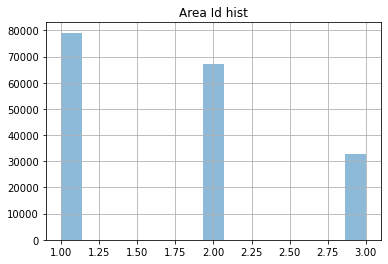

In [15]:
#Area Id直方图
plt.title("Area Id hist")
data['Area Id'].hist(alpha=0.5,bins=15)

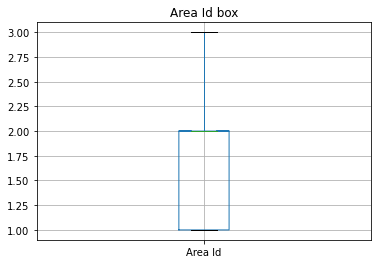

In [16]:
#Area Id盒图
plt.title("Area Id box")
data['Area Id'].plot(kind='box',notch=True,grid=True)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


((array([-4.47333396, -4.27995935, -4.17496761, ...,  4.17496761,
          4.27995935,  4.47333396]),
  array([ 1.,  1.,  1., ..., nan, nan, nan])),
 (nan, nan, nan))

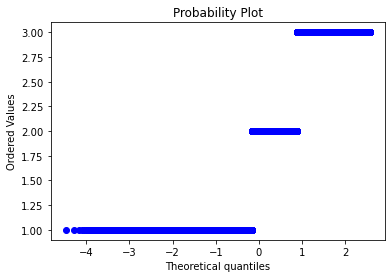

In [17]:
#Area Id q-q图
stats.probplot(data['Area Id'],dist="norm",plot=plt)

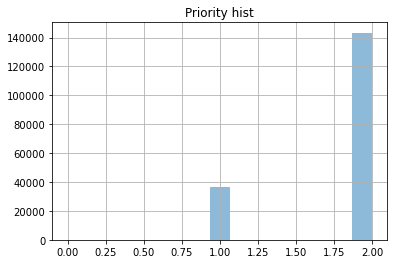

In [18]:
#Priority直方图
plt.title("Priority hist")
data['Priority'].hist(alpha=0.5,bins=15)

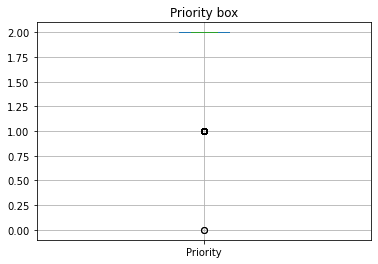

In [19]:
#Priority盒图
plt.title("Priority box")
data['Priority'].plot(kind='box',notch=True,grid=True)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


((array([-4.47333396, -4.27995935, -4.17496761, ...,  4.17496761,
          4.27995935,  4.47333396]),
  array([ 0.,  0.,  1., ...,  2.,  2., nan])),
 (nan, nan, nan))

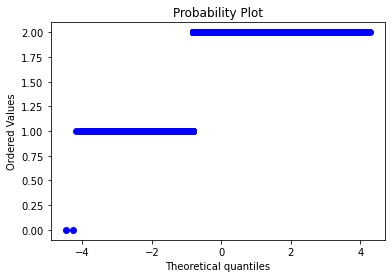

In [20]:
#Priorityqq图
stats.probplot(data['Priority'],dist="norm",plot=plt)

两个数据分布均比较集中

# 2 数据缺失处理

这里对Area Id数据进行缺失值处理

## 2.1 缺失值剔除

直接把缺失值删除

In [21]:
new_AreaId_data1 = data['Area Id'].copy(deep=True)
new_AreaId_data1= new_AreaId_data1.dropna()

In [22]:
new_AreaId_data1.isnull().sum()

0

### 可视化地对比新旧数据集

In [23]:
def drawhist(new_data):
    #直方图
    plt.figure(figsize = (10,3))

    plt.subplot(1,2,1)
    plt.title("Area Id hist")
    data['Area Id'].hist(alpha=0.5,bins=15)

    plt.subplot(1,2,2)
    plt.title("new Area Id hist")
    new_data.hist(alpha=0.5,bins=15) 

In [24]:
def drawbox(new_data):
    #盒图
    plt.figure(figsize = (10,3))

    plt.subplot(1,2,1)
    plt.title("Area Id box")
    data['Area Id'].plot(kind='box',notch=True,grid=True)

    plt.subplot(1,2,2)
    plt.title("new Area Id box")
    new_data.plot(kind='box',notch=True,grid=True)

In [25]:
def drawqq(new_data):
    #q-q图
    plt.figure(figsize = (10,3))

    plt.subplot(1,2,1)
    stats.probplot(data['Area Id'],dist="norm",plot=plt)

    plt.subplot(1,2,2)
    stats.probplot(new_data,dist="norm",plot=plt)

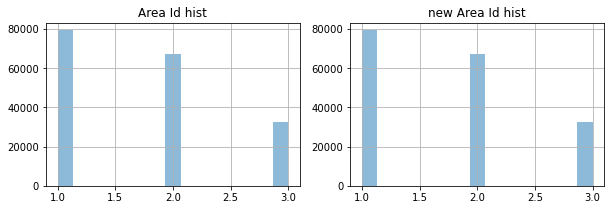

In [26]:
drawhist(new_AreaId_data1)

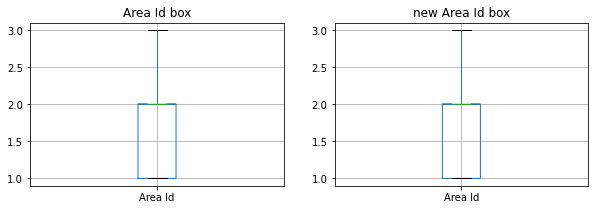

In [27]:
drawbox(new_AreaId_data1)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


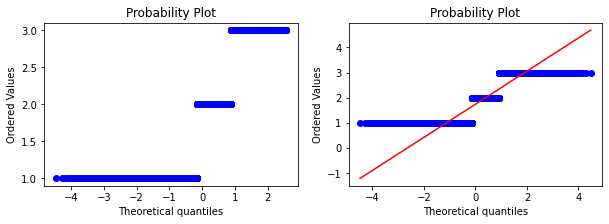

In [28]:
drawqq(new_AreaId_data1)

In [29]:
new_AreaId_data1.describe()  #数据统计

count    179112.000000
mean          1.740648
std           0.746468
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Area Id, dtype: float64

## 2.2 用最高频率值来填补缺失值

使用最高频率值，即众数来填补缺失值。

In [30]:
new_AreaId_data2 = data['Area Id'].copy(deep=True)
AreaId_mode = Counter(new_AreaId_data2).most_common(1)[0][0]
new_AreaId_data2 = new_AreaId_data2.fillna(AreaId_mode)

In [31]:
new_AreaId_data2.isnull().sum()

0

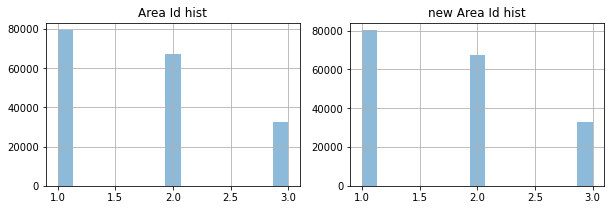

In [32]:
drawhist(new_AreaId_data2)

### 可视化对比新旧数据

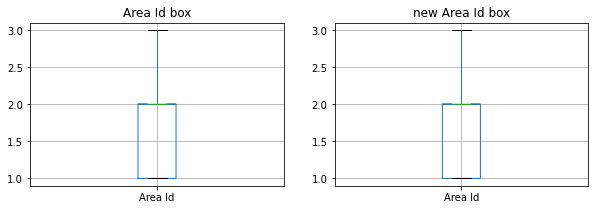

In [33]:
drawbox(new_AreaId_data2)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


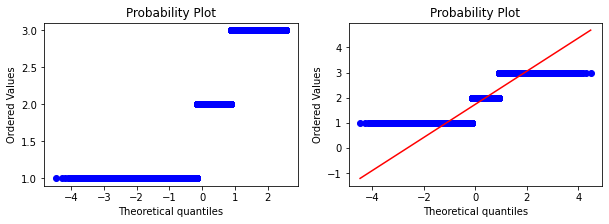

In [34]:
drawqq(new_AreaId_data2)

In [35]:
new_AreaId_data2.describe()#数据描述

count    180016.000000
mean          1.736929
std           0.746430
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Area Id, dtype: float64

## 2.3 通过属性的相关关系来填补缺失值

探寻变量之间的相关关系，找到相关性较高的两个变量后，再寻找他们之间的线性回归关系，最后通过线性回归关系计算缺失值进行填补。

查看属性的相关关系

In [36]:
data.corr()

,Area Id,Priority
Area Id,1.000000,-0.023366
Priority,-0.023366,1.000000


可见Area ID与priority具有相关性，建立线性预测模型来预测缺失值

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
new_data = data.dropna(subset=['Area Id'])
x = new_data['Priority']
y = new_data['Area Id']
x = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
model.coef_,model.intercept_

(array([-0.04322071]), 1.8182398592358373)

In [39]:
new_AreaId_data3 = data['Area Id'].copy(deep=True)
new_Priority_data = data['Priority'].copy(deep=True)
i=0
flag1 = new_AreaId_data3.isnull().values
flag2 = new_Priority_data.isnull().values
for _,value in new_AreaId_data3.iteritems():
    if (flag1[i]==True) and (flag2[i]==False):
        new_AreaId_data3[i] = -0.04322071*new_Priority_data[i]+1.8182398592358373
    i=i+1

In [40]:
new_AreaId_data3.isnull().sum()

1

In [41]:
new_AreaId_data3.describe()

count    180015.000000
mean          1.740611
std           0.744594
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Area Id, dtype: float64

### 可视化对比新旧数据集

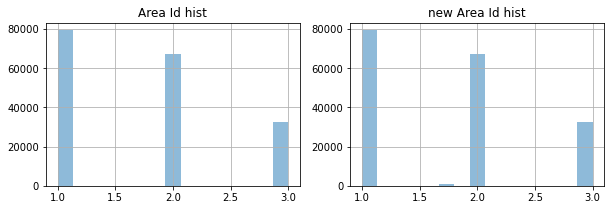

In [42]:
drawhist(new_AreaId_data3)

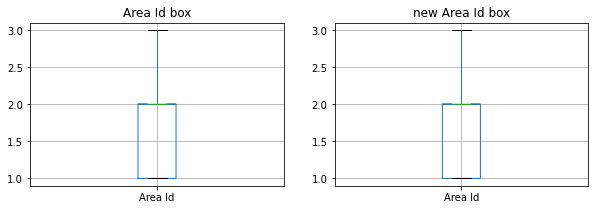

In [43]:
drawbox(new_AreaId_data3)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


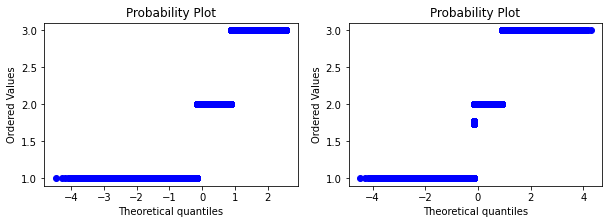

In [44]:
drawqq(new_AreaId_data3)

## 2.4 通过对象的相似性填补缺失值

通过数据对象priority之间的相似性来填补缺失值

In [51]:
Object = ['Area Id','Priority']

#找到最相似数据
def find_resemble_data(dataset, pos, Object):
    def dis_objs(left_index, right_index):
        left = dataset.iloc[left_index]
        right = dataset.iloc[right_index]
        result = 0
        for col in left.index:
            if col == 'Priority':
                if (not math.isnan(left[col])) and (not math.isnan(right[col])):                 
                    result += right[col] - left[col]                
                else:
                    result += 999
        return result

    
    median = 999
    result_pos = -1
    left = 0;
    right = dataset.shape[0]-1
    
    while left<=right:
        median = int((left+right)/2)
        tmpdis = dis_objs(pos,median)        
        if(tmpdis>0):
            right = median-1            
        elif(tmpdis == 0):
            result_pos = median
            break;
        else:
            left = median+1        
        if(tmpdis<median):
            result_pos = median  
    return result_pos




new_data = pd.DataFrame(data[Object].copy(deep=True))

new_data.sort_values("Priority",inplace=True)
new_AreaID_data4 = new_data['Area Id'].copy(deep=True)

length = new_data.shape[0]
count=1;
for i in range(length):
    if math.isnan(new_data['Area Id'].iloc[i]):  
        result = find_resemble_data(new_data, i, Object)
        new_AreaID_data4.iloc[i] = new_AreaID_data4.iloc[result]
        count+=1

In [52]:
new_AreaID_data4.isnull().sum()

0

In [53]:
new_AreaID_data4.describe()#数据描述

count    180016.000000
mean          1.741945
std           0.744819
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: Area Id, dtype: float64

### 可视化对比新旧数据集

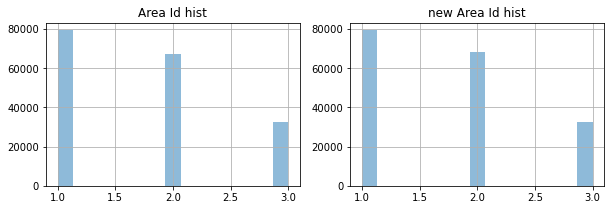

In [54]:
drawhist(new_AreaID_data4)

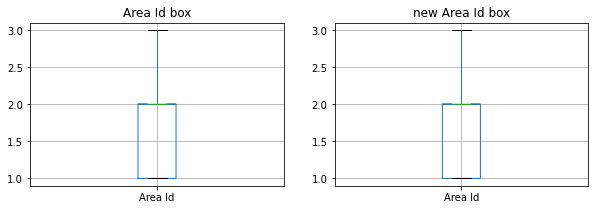

In [55]:
drawbox(new_AreaID_data4)

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


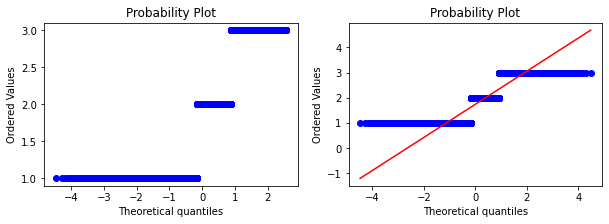

In [56]:
drawqq(new_AreaID_data4)